In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2025-07-01'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\user\AppData\Local\Temp\ipykernel_16212\828257128.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
data.reset_index(inplace=True)

In [7]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.475201,16.543042,16.152336,16.166451,147611217
1,2012-01-04,16.546255,16.595032,16.356598,16.465787,114989399
2,2012-01-05,16.316736,16.439543,16.247905,16.393986,131808205
3,2012-01-06,16.094152,16.341251,16.088457,16.320205,108119746
4,2012-01-09,15.411779,16.019378,15.381325,16.006996,233776981
...,...,...,...,...,...,...
3387,2025-06-24,167.740005,169.250000,166.910004,167.684998,27310300
3388,2025-06-25,171.490005,173.360001,168.561005,168.649994,23627400
3389,2025-06-26,174.429993,174.649994,170.860001,173.384995,25909100


In [8]:
ma_100 = data.Close.rolling(100).mean()

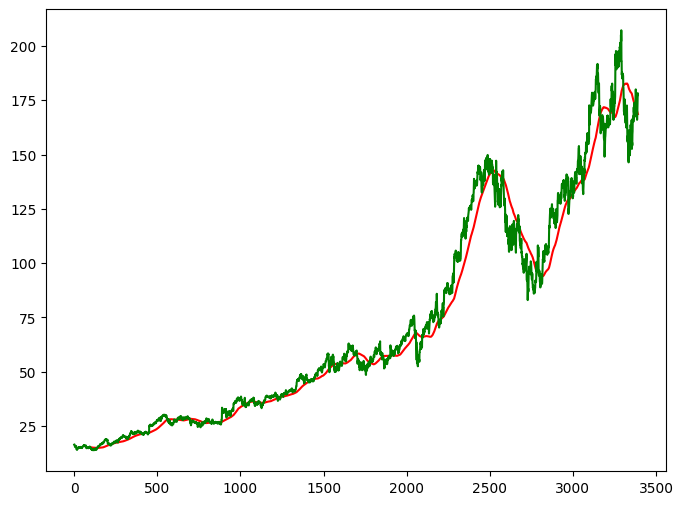

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
ma_200 = data.Close.rolling(200).mean()

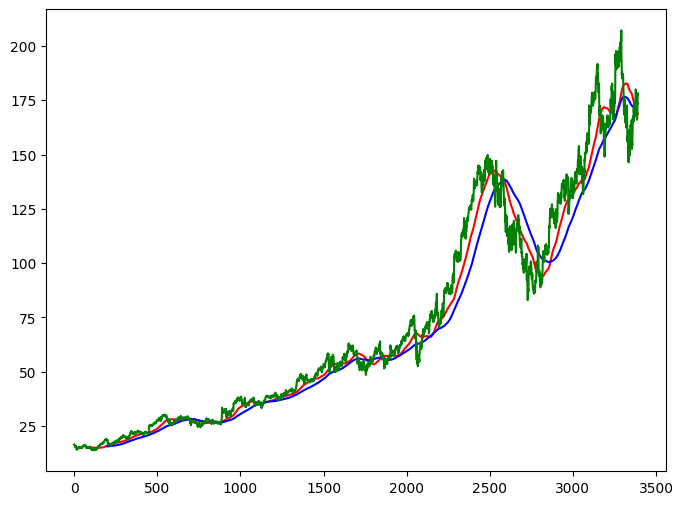

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100, 'r')
plt.plot(ma_200, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [19]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*.80): len(data)])

In [20]:
data_train.shape[0], data_test.shape[0]

(2713, 679)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [22]:
data_train_scaler = scaler.fit_transform(data_train)

In [24]:
x=[]
y=[]
for i in range(100, data_train_scaler.shape[0]):
    x.append(data_train_scaler[i-100:i])
    y.append(data_train_scaler[i,0])

In [28]:
x, y = np.array(x), np.array(y)

In [27]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [30]:
model = Sequential()
model.add(LSTM(units=50, activation = 'relu', return_sequences = True, input_shape = ((x.shape[1],1))))
model.add(Dropout(.2))

model.add(LSTM(units=60, activation = 'relu', return_sequences = True))
model.add(Dropout(.3))

model.add(LSTM(units=80, activation = 'relu', return_sequences = True))
model.add(Dropout(.4))

model.add(LSTM(units=120, activation = 'relu'))
model.add(Dropout(.5))

model.add(Dense(units=1))

In [39]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [40]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 48s 408ms/step - loss: 0.0485
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 38s 464ms/step - loss: 0.0053
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 27s 333ms/step - loss: 0.0057
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 32s 385ms/step - loss: 0.0042
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 355ms/step - loss: 0.0054
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 365ms/step - loss: 0.0039
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 27s 330ms/step - loss: 0.0043
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 27s 327ms/step - loss: 0.0030
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 19s 232ms/step - loss: 0.0032
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 17s 201ms/step - loss: 0.0034
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 26s 315ms/step - loss: 0.0042
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 29s 345ms/step - loss: 0.0027
Epoch 13/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 28s 339ms/step - loss: 0.0031
Epoch 14/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 41s 350ms/step - loss: 0.0030
Epoch 15/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 23s 

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [44]:
past_100 = data_train.tail(100)

In [45]:
data_test = pd.concat([past_100, data_test], ignore_index = True)

In [47]:
data_test_scaler = scaler.fit_transform(data_test)

In [48]:
x=[]
y=[]
for i in range(100, data_test_scaler.shape[0]):
    x.append(data_test_scaler[i-100:i])
    y.append(data_test_scaler[i,0])

x, y = np.array(x), np.array(y)

In [49]:
y_predict = model.predict(x)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step


In [53]:
scale = 1/scaler.scale_

In [54]:
y_predict = y_predict*scale

In [55]:
y = y*scale

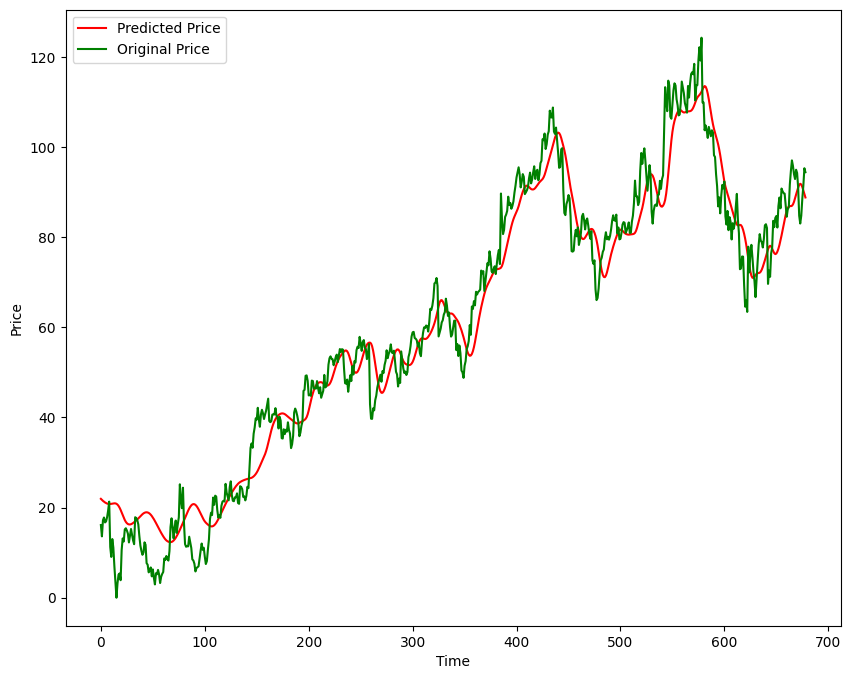

In [59]:
plt.figure(figsize = (10, 8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [60]:
model.save('StockSage.keras')